# Credit Card Fraud Detection - Machine Learning Project

## Introduction
#### What is Credit card fraud?
Credit card fraud happens when someone — a fraudster or a thief — uses your stolen credit card or the information from that card to make unauthorized purchases in your name or take out cash advances using your account.

#### How does it happen?
Here are some examples:
1. A thief digs through your trash, finds discarded receipts or credit card statements that include your account number, and uses that information to rack up fraudulent charges.
2. You swipe your card at your local ATM or at the gas pump. Later, you notice fraudulent purchases on your statement. What happened? Someone might have installed a credit card skimmer to steal your account information. A credit card skimmer is a small device that thieves can install anywhere you swipe your card. Skimming has proved to be an effective way for thieves to steal credit card information.
3. Someone in your home — a resident, guest, visitor, or service technician — might manage to access your credit cards. It’s possible the person could use your credit card information fraudulently.

#### Why is it important to detect fraud?
Well, it is important for the banks that has issued the card as well as to the card holder. If number of frauds increase, this implies that bank has to reimburse the amount lost by the customer, which on a large scale is a hectic problem. Moreover, customers also go through a stressful period and have to wait for at least 50 days before their situation could be processed and resolved. Therefore, to prevent these predicaments, we can apply Machine learning concepts/models and recognize any patterns in the data so that we can prevent the fraudulent transaction.

#### What is required for building the model?
We require the data that consists of a number of transactions that are classified as frauds or normal. The dataset can be highly imbalanced as frauds do not happen much frequently. Therefore, we will have to perform some EDA and then come up with some models for classification. After measuring their accuracy, we will apply some hypertuning methods (if needed) to increase the accuracy of the best model. Finally, we will save our model and it will be ready to be deployed on any platform.

Link - [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

LETS BEGIN!

In [56]:
# Importing all the modules required.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

## Loading The Data

In [2]:
df = pd.read_csv("../datasets/creditcard.csv")

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759072e-12,-8.251146e-13,-9.655448e-13,8.321385e-13,1.649983e-13,4.248434e-13,-3.054696e-13,8.777981e-14,-1.179757e-12,...,-3.405785e-13,-5.723165e-13,-9.725860e-13,1.464148e-12,-6.987110e-13,-5.617884e-13,3.332082e-12,-3.518875e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Lets check how many normal and fraud cases are there in total.
cases = df['Class'].value_counts()
normal_cases = cases[0]
fraud_cases = cases[1]
print(f'Normal Cases: {normal_cases}\nFraud Cases: {fraud_cases}')

Normal Cases: 284315
Fraud Cases: 492


In [7]:
percent_fraud = (fraud_cases/(fraud_cases+normal_cases))*100
print(f'Fraud Cases % = {percent_fraud:.2f}%')

Fraud Cases % = 0.17%


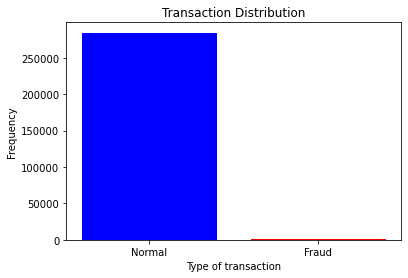

In [8]:
# Let us visualize the two classes.
x = [0,1]
y = [normal_cases, fraud_cases]
labels = ['Normal', 'Fraud']
plt.bar(x, y, color=['blue', 'red'])
plt.xticks(range(2), labels)
plt.title('Transaction Distribution')
plt.xlabel('Type of transaction')
plt.ylabel('Frequency')
plt.show()

In [9]:
fraud = df[df['Class']==1]
print('Fraudulent Amounts described:')
fraud['Amount'].describe()

Fraudulent Amounts described:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

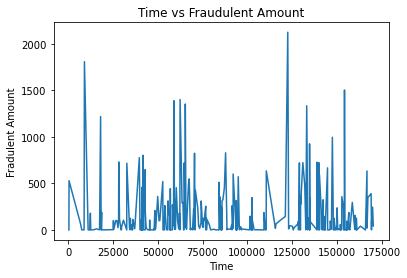

In [10]:
# Let us plot time vs amount in case of fraud cases.
time_of_fraud = fraud['Time'].to_list()
fraudulent_amount = fraud['Amount'].to_list()
plt.plot(time_of_fraud, fraudulent_amount)
plt.title('Time vs Fraudulent Amount')
plt.xlabel('Time')
plt.ylabel('Fradulent Amount')
plt.show()

In [11]:
normal_transactions = df[df['Class']==0]
print('Normal transactions described: ')
normal_transactions['Amount'].describe()

Normal transactions described: 


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

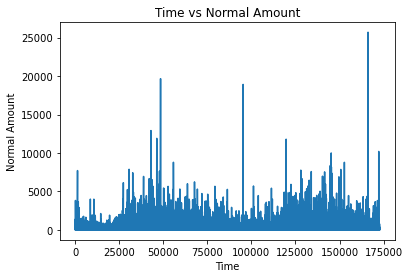

In [12]:
# Let us visualize time vs normal transactions.
time_normal = normal_transactions['Time'].to_list()
normal_amounts = normal_transactions['Amount'].to_list()
plt.plot(time_normal, normal_amounts)
plt.title('Time vs Normal Amount')
plt.xlabel('Time')
plt.ylabel('Normal Amount')
plt.show()

As per the two graphs above, we can infer that the fraudulent transactions are very much spread out i.e. they are not that frequent. However, we can see that between 50000 - 75000, the fraudulent transactions were more in frequency as well as mean amount. As we are not given the feature names and details (only PCA is given), we cannot draw any deeper insight. 

Let us move on to more EDA.

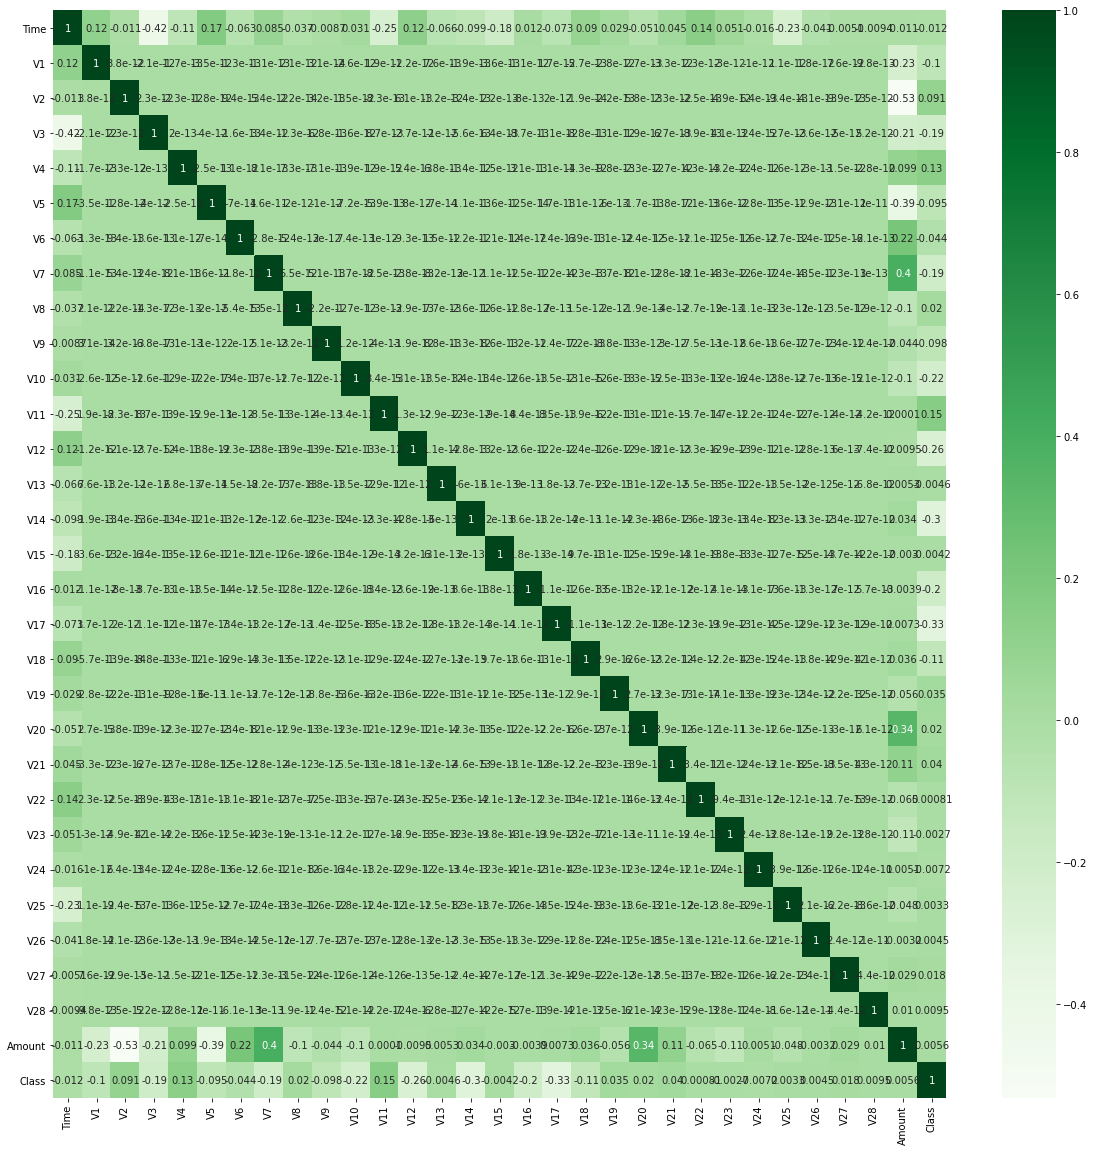

In [13]:
cm = df.corr()
top_corr_features = cm.index
plt.figure(figsize=(20,20))
sb.heatmap(df[top_corr_features].corr(),annot=True,cmap="Greens")
plt.show()

In [14]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values. Therefore we can move to training our model.

## Feature Scaling
We have to scale some features of the data. As we can see from the dataframe, the *Amount* has to be scaled to the level of *Vi*(s).

In [15]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


## Splitting The Data Into Training And Testing
As the sample is too large, we will use 20% of the data and check the accuracy with that portion
of the dataset. We are doing it because we would need more time and computation power to train a data which is 
this large (284807 rows). Once we obtain good accuracy (detecting the outliers correctly), we can train the whole model with all the rows included (with a sufficient computation power). 

In [16]:
df1 = df.sample(frac=0.2, random_state=1)
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.346073,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.345313,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.349671,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.289340,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.350191,0


In [17]:
df1.shape

(56961, 31)

In [18]:
cases_count_df1 = df1['Class'].value_counts()
normal_count_df1 = cases_count_df1[0]
fraud_count_df1 = cases_count_df1[1]
print('In 20% sample:')
print(f'Fraud = {fraud_count_df1}\nNormal = {normal_count_df1}')

In 20% sample:
Fraud = 87
Normal = 56874


In [19]:
col_list = df1.columns.to_list()
cols = [c for c in col_list if c not in ['Class']]
x = df1[cols]
y = df1['Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

## Training The Models
For the training we will use the following models:
- **Logistic Regression:** It is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).


- **SVM:** In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. For example, if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates (these co-ordinates are known as Support Vectors). Now, we will find some line that splits the data between the two differently classified groups of data. This will be the line such that the distances from the closest point in each of the two groups will be farthest away. 


- **Decision Tree:** In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible. Decision trees work in very similar fashion by dividing a population in as different groups as possible.


- **Random Forest:** Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).


- **Isolation Forest:** Isolation forest is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies, instead of the most common techniques of profiling normal points.



In [38]:
# Let us create a performance function.

def get_performance(cm):
    acc = ((cm[0][0] + cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))*100
    valid_det = (cm[0][0]/(cm[0][0]+cm[1][0]))*100
    outlier_det = (cm[1][1]/(cm[0][1]+cm[1][1]))*100
    return f'Overall accuracy = {acc:.6f}%\nValid transaction accuracy = {valid_det:.6f}%\nFraud transaction accuracy = {outlier_det:.6f}%'

In [55]:
# Logistic Regression.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print('MODEL: Logistic Regression')
print('Confusion matrix:')
print(cm_logreg)
print()
print(get_performance(cm_logreg))
print('Classification report:')
print(classification_report(y_test, y_pred_logreg))

MODEL: Logistic Regression
Confusion matrix:
[[11373     3]
 [    6    11]]

Overall accuracy = 99.921004%
Valid transaction accuracy = 99.947271%
Fraud transaction accuracy = 78.571429%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11376
           1       0.79      0.65      0.71        17

    accuracy                           1.00     11393
   macro avg       0.89      0.82      0.85     11393
weighted avg       1.00      1.00      1.00     11393



Nice results!

In [54]:
# SVM.
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('MODEL: Support Vector Machine')
print('Confusion matrix:')
print(cm_svm)
print()
print(get_performance(cm_svm))
print('Classification report:')
print(classification_report(y_test, y_pred_svm))

MODEL: Support Vector Machine
Confusion matrix:
[[11376     0]
 [   17     0]]

Overall accuracy = 99.850786%
Valid transaction accuracy = 99.850786%
Fraud transaction accuracy = nan%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11376
           1       0.00      0.00      0.00        17

    accuracy                           1.00     11393
   macro avg       0.50      0.50      0.50     11393
weighted avg       1.00      1.00      1.00     11393



c:\users\amaan\python projects\credit card fraud detection\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  
c:\users\amaan\python projects\credit card fraud detection\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Very bad results as SVM did not detect frauds at all!!

In [53]:
# Decision Tree.
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print('MODEL: Decision Tree')
print('Confusion matrix:')
print(cm_dt)
print()
print(get_performance(cm_dt))
print('Classification report:')
print(classification_report(y_test, y_pred_dt))

MODEL: Decision Tree
Confusion matrix:
[[11369     7]
 [    5    12]]

Overall accuracy = 99.894672%
Valid transaction accuracy = 99.956040%
Fraud transaction accuracy = 63.157895%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11376
           1       0.63      0.71      0.67        17

    accuracy                           1.00     11393
   macro avg       0.82      0.85      0.83     11393
weighted avg       1.00      1.00      1.00     11393



In [52]:
# Random Forest.
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('MODEL: Random Forest')
print('Confusion matrix:')
print(cm_rf)
print()
print(get_performance(cm_rf))
print('Classification report:')
print(classification_report(y_test, y_pred_rf))

MODEL: Random Forest
Confusion matrix:
[[11373     3]
 [    4    13]]

Overall accuracy = 99.938559%
Valid transaction accuracy = 99.964841%
Fraud transaction accuracy = 81.250000%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11376
           1       0.81      0.76      0.79        17

    accuracy                           1.00     11393
   macro avg       0.91      0.88      0.89     11393
weighted avg       1.00      1.00      1.00     11393



In [51]:
# Isolation Forest.
outlier_frac = fraud_count_df1/float(normal_count_df1)

isof = IsolationForest(max_samples= len(x), contamination=outlier_frac)
isof.fit(x)
y_pred_isof = isof.predict(x)
y_pred_isof[y_pred_isof == 1] = 0
y_pred_isof[y_pred_isof == -1] = 1
errors_isof = (y_pred_isof != y).sum() # Calculating total errors.

print('MODEL: Isolation Forest')
print(f'Errors: {errors_isof}')
acc = accuracy_score(y, y_pred_isof)*100
print(f'Overall accuracy = {acc:.6f}%')
print('Classification report:')
print(classification_report(y, y_pred_isof))

MODEL: Isolation Forest
Errors: 127
Overall accuracy = 99.777040%
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.27      0.28      0.27        87

    accuracy                           1.00     56961
   macro avg       0.64      0.64      0.64     56961
weighted avg       1.00      1.00      1.00     56961



## Results/Insights/Conclusion
For detection of fraud, we do not need to know more about the overall accuracy but the accuracy of the outliers detected. 
Out of the 5 models used, Isolation forest was tested on the whole 20% of the data and we measured its accuracy differently than the others. 

The best model with the highest accuracy for the fraud cases came out to be Random Forest with **81%**. However, we can use Isolation forest also as this model was designed for detecting outliers only. Therefore, if more computation power is given, Isolation forest can match the performance of Random forest and most probably beat Random forest model. Anyways, we will save our **rf** object.


## Saving The Best Model 

In [57]:
# Using pickle to save our model.
with open('model', 'wb') as f:
    pickle.dump(rf, f)

## References
- [Commonly Used Machine Learning Algorithms](https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/)
- [What is Credit Card Fraud](https://www.lifelock.com/learn-fraud-what-is-credit-card-fraud.html)
- [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)